### Importing Necessary Libraries

In this section, we import the libraries required for data manipulation, visualization, and analysis. Below is a list of the imported libraries along with their primary usage:

- **`pandas`**:  
  Used for data manipulation and analysis, particularly for handling tabular data structures like DataFrames.

- **`matplotlib.pyplot`**:  
  Provides functionalities for creating static, interactive, and animated visualizations in Python.

- **`numpy`**:  
  Supports numerical computations and operations on arrays, enabling efficient handling of numerical data.

- **`scipy.interpolate.make_interp_spline`**:  
  Used for smoothing data points to enhance the visual representation of trends in data.

- **`seaborn`**:  
  A data visualization library based on matplotlib that provides an interface for creating informative and visually appealing statistical graphics.

- **`statsmodels.tsa.statespace.sarimax.SARIMAX`**:  
  Supports time series modeling and forecasting using SARIMA models for advanced analytics.

- **`scipy.stats`**:  
  A module for performing a variety of statistical computations, including probability distributions, hypothesis testing, and statistical metrics.


In [379]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
import scipy.stats as stats


### Load and Preview Yearly Smoke Estimate Data

The following code snippet reads the `yearly_smoke_estimate.csv` file from the derived data folder and displays the first few rows of the dataset:

In [380]:
#Reading smoke estimates data
yearly_smoke_estimate = pd.read_csv('../data/derived/yearly_smoke_estimate.csv')
yearly_smoke_estimate.head()


,Unnamed: 0,Fire_Year,Smoke_Estimate
0,0,1961,0.000350
1,1,1962,0.006384
2,2,1963,0.004055
3,3,1964,0.000124
4,4,1965,0.000357


# New York State Vital Statistics Data Import

This code imports death statistics data from the New York State Health Data portal. The dataset contains death counts categorized by resident county, region, and selected causes of death from 2003 onwards.

### Data Source
- **Source**: New York State Health Data Portal
- **URL**: [Vital Statistics - Deaths by Resident County and Region](https://health.data.ny.gov/Health/Vital-Statistics-Deaths-by-Resident-County-Region-/eyur-mqqm)
- **Owner**: Bureau of Vital and Health Statistics, Division of Information and Statistics

### Code Description
The following code:
1. Defines the path to the CSV file containing the vital statistics data.
2. Uses pandas to read the CSV file into a DataFrame.
3. Displays the first few rows of the data using `head()`.


In [381]:
#fetching data from https://health.data.ny.gov/Health/Vital-Statistics-Deaths-by-Resident-County-Region-/eyur-mqqm/about_data
#Dataset Owner	Bureau of Vital and Health Statistics, Division of Information and Statistics,
#This dataset contains death counts for selected causes of death by county and region.

#path to the csv file
# file_path = '../data/raw/Vital_Statistics_Deaths_by_Resident_County__Region__and_Selected_Cause_of_Death___Beginning_2003__20241106.csv'
file_path = '../data/raw/Vital_Statistics_Deaths_by_Resident_County__Region__and_Selected_Cause_of_Death.csv'

#loading into a df
df = pd.read_csv(file_path)

df.head()


,Year,County Name,Region,Selected Cause of Death,Deaths
0,2003,Onondaga,ROS,CLRD,205
1,2003,Onondaga,ROS,Diseases of the Heart,840
2,2003,Onondaga,ROS,AIDS,11
3,2003,Onondaga,ROS,Diabetes Mellitus,37
4,2003,Onondaga,ROS,Pneumonia,96


# Data Filtering for Onondaga County

This code filters the dataset to focus specifically on Onondaga County records. The filtering is performed using boolean indexing on the 'County Name' column to extract only the rows where the county name matches 'Onondaga'.

### Code Description
- Creates a new DataFrame `county_df` containing only Onondaga County data
- Uses pandas boolean indexing with the condition `df['County Name'] == 'Onondaga'`
- Displays the first few rows of the filtered dataset using `head()`

In [382]:
#filtering rows where 'Area Name' = 'Syracuse Metro Area'
county_df = df[df['County Name'] == 'Onondaga']
county_df.head()

,Year,County Name,Region,Selected Cause of Death,Deaths
0,2003,Onondaga,ROS,CLRD,205
1,2003,Onondaga,ROS,Diseases of the Heart,840
2,2003,Onondaga,ROS,AIDS,11
3,2003,Onondaga,ROS,Diabetes Mellitus,37
4,2003,Onondaga,ROS,Pneumonia,96


# Data Pivoting and Restructuring

This code reorganizes the dataset by creating a pivot table that transforms the **'Selected Cause of Death'** categories into columns, making it easier to analyze death counts across different causes for each year.

### Code Description
The `pivot_table` operation:
- **Index Columns**: Groups data by `"Year"`, `"County Name"`, and `"Region"`.
- **Columns**: Transforms `"Selected Cause of Death"` into separate columns.
- **Values**: Populates the table with death counts from the `"Deaths"` column.
- **Missing Values**: Fills any missing entries with `0` to avoid `NaN`.
- **Index Reset**: Converts the hierarchical index back into regular columns.

### Parameters
- **index**: `["Year", "County Name", "Region"]`
- **columns**: `"Selected Cause of Death"`
- **values**: `"Deaths"`
- **fill_value**: `0`


In [383]:
#pivotting the df
pivoted_df = county_df.pivot_table(
    index=["Year", "County Name", "Region"],
    columns="Selected Cause of Death",
    values="Deaths",
    fill_value=0
).reset_index()


pivoted_df.head()

Selected Cause of Death,Year,County Name,Region,AIDS,Accidents,All Other Causes,CLRD,Cerebrovascular Disease,Diabetes Mellitus,Diseases of the Heart,Malignant Neoplasms,Pneumonia
0,2003,Onondaga,ROS,11.0,160.0,1090.0,205.0,239.0,37.0,840.0,988.0,96.0
1,2004,Onondaga,ROS,8.0,165.0,1105.0,220.0,185.0,31.0,880.0,899.0,71.0
2,2005,Onondaga,ROS,13.0,170.0,894.0,225.0,186.0,28.0,870.0,955.0,101.0
3,2006,Onondaga,ROS,9.0,175.0,974.0,235.0,173.0,26.0,910.0,991.0,127.0
4,2007,Onondaga,ROS,6.0,180.0,872.0,245.0,197.0,30.0,935.0,934.0,111.0


# Percentage Analysis and Visualization of Death Causes

This code generates a visualization that illustrates trends in different causes of death as percentages of total deaths over time in Onondaga County. The visualization employs smooth spline interpolation to create continuous trend lines while preserving the original data points.

### Data Preparation
1. Creates a copy of the pivoted DataFrame for percentage calculations.
2. Converts the `Year` column to string type for better plotting on the x-axis.
3. Calculates the total deaths for each row across all causes.
4. Computes the percentage contribution of each cause of death to the total deaths.

### Visualization Setup
- **Matplotlib Style**: `bmh` style is used for a clean and professional appearance.
- **Figure Size**: 12x8 inches for a detailed and easy-to-read visualization.
- **Color Palette**: A custom palette is defined to differentiate the causes of death.
- **Spline Interpolation**: Smooth curves are generated using `make_interp_spline`.

### Plot Features
- **Trend Lines**: Smooth curves show trends, complemented by data points for accuracy.
- **Color Coding**: Each cause of death has a unique color for clarity.
- **Annotations**: Includes a clear title, axis labels, and a well-positioned legend.
- **Legend Placement**: Positioned outside the main plot area for better readability.
- **X-axis Labels**: Rotated for easier interpretation of years.
- **Gridlines**: Included for better alignment and data comprehension.
- **Layout**: Automatically adjusted to prevent overlaps or label cutoff.

### Additional Details
- **Spline Interpolation**: `make_interp_spline` is used for creating smooth trend lines.
- **Dual Representation**: Both line plots and scatter plots are included for each cause.
- **Axis Formatting**:
  - **X-axis**: Represents years.
  - **Y-axis**: Represents percentages of total deaths.
- **Legend**: Displays categories of causes of death for context.


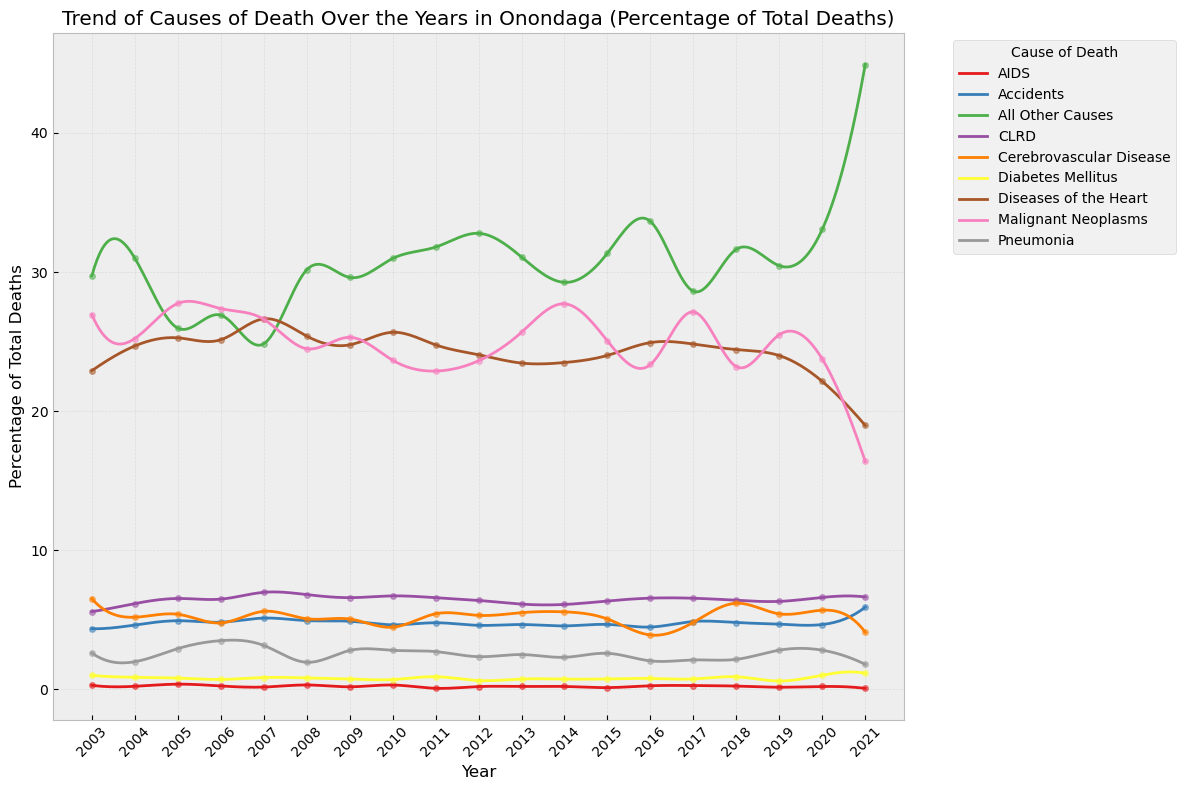

In [384]:
#set the style to a built-in matplotlib style
plt.style.use('bmh')

#create percentage df
percentage_df = pivoted_df.copy()
percentage_df["Year"] = percentage_df["Year"].astype(str)

#calculating row totals for percentage calculation
row_totals = percentage_df[['AIDS', 'Accidents', 'All Other Causes', 'CLRD',
                           'Cerebrovascular Disease', 'Diabetes Mellitus', 'Diseases of the Heart',
                           'Malignant Neoplasms', 'Pneumonia']].sum(axis=1)

#calculate percentages
for column in ['AIDS', 'Accidents', 'All Other Causes', 'CLRD',
               'Cerebrovascular Disease', 'Diabetes Mellitus', 'Diseases of the Heart',
               'Malignant Neoplasms', 'Pneumonia']:
    percentage_df[column] = (percentage_df[column] / row_totals) * 100

# Create the plot
plt.figure(figsize=(12, 8))

causes_of_death = [
    "AIDS", "Accidents", "All Other Causes", "CLRD",
    "Cerebrovascular Disease", "Diabetes Mellitus", "Diseases of the Heart",
    "Malignant Neoplasms", "Pneumonia"
]

# Define a color palette
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', 
          '#ffff33', '#a65628', '#f781bf', '#999999']

# Convert years to numeric for smooth interpolation
years = percentage_df["Year"].astype(int).values
years_smooth = np.linspace(years.min(), years.max(), 300)

for cause, color in zip(causes_of_death, colors):
    # Create the smooth spline
    spl = make_interp_spline(years, percentage_df[cause], k=3)
    percentage_smooth = spl(years_smooth)
    
    # Plot smooth line with original points
    plt.plot(years_smooth, percentage_smooth, label=cause, color=color)
    plt.plot(years, percentage_df[cause], 'o', alpha=0.5, markersize=4, color=color)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Percentage of Total Deaths")
plt.title("Trend of Causes of Death Over the Years in Onondaga (Percentage of Total Deaths)")
plt.legend(title="Cause of Death", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(years)
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Data Integration: Merging Death Statistics with Smoke Estimates

This code integrates the death statistics data with the yearly smoke estimate data, creating a unified dataset for analysis. The merge operation aligns the two datasets based on the year, enabling exploration of potential correlations between smoke exposure and mortality rates.

### Data Cleaning Steps
1. **Column Removal**: Drops the unnecessary `"Unnamed: 0"` column from the smoke estimate data.
2. **Year Standardization**: Converts the year column in both datasets to string type for consistency.
3. **Merge Operation**: Performs a left join to retain all records from the death statistics dataset.
4. **Redundant Column Cleanup**: Removes duplicate year columns post-merge.

### Merge Details
- **Left Table**: `percentage_df` (death statistics with percentages)
- **Right Table**: `yearly_smoke_estimate_cleaned` (processed smoke data)
- **Join Key**: `Year` (from death statistics) = `Fire_Year` (from smoke estimates)
- **Join Type**: Left join, ensuring that all death statistics records are preserved, even if smoke data is missing for a given year.

### Output
The first few rows of the merged dataset are displayed, showcasing both the mortality percentages and the smoke estimate data for integrated analysis.


In [385]:
# Drop the "Unnamed: 0" column from yearly_smoke_estimate
yearly_smoke_estimate_cleaned = yearly_smoke_estimate.drop(columns=["Unnamed: 0"])

# Ensure both Year columns are of the same type (string) for consistency
yearly_smoke_estimate_cleaned["Fire_Year"] = yearly_smoke_estimate_cleaned["Fire_Year"].astype(str)
percentage_df["Year"] = percentage_df["Year"].astype(str)

# Perform the join on Year with Fire_Year
merged_df = percentage_df.merge(yearly_smoke_estimate_cleaned, left_on="Year", right_on="Fire_Year", how="left")

# Drop the redundant "Fire_Year" column after merging
merged_df = merged_df.drop(columns=["Fire_Year"])

# Display the result
merged_df.head()


,Year,County Name,Region,AIDS,Accidents,All Other Causes,CLRD,Cerebrovascular Disease,Diabetes Mellitus,Diseases of the Heart,Malignant Neoplasms,Pneumonia,Smoke_Estimate
0,2003,Onondaga,ROS,0.300055,4.364430,29.732679,5.591926,6.519367,1.009274,22.913257,26.950355,2.618658,0.161654
1,2004,Onondaga,ROS,0.224467,4.629630,31.004489,6.172840,5.190797,0.869809,24.691358,25.224467,1.992144,0.364275
2,2005,Onondaga,ROS,0.377687,4.938989,25.973271,6.536897,5.403835,0.813481,25.276002,27.745497,2.934340,0.336343
3,2006,Onondaga,ROS,0.248619,4.834254,26.906077,6.491713,4.779006,0.718232,25.138122,27.375691,3.508287,0.578177
4,2007,Onondaga,ROS,0.170940,5.128205,24.843305,6.980057,5.612536,0.854701,26.638177,26.609687,3.162393,0.729326


# Correlation Analysis: Smoke Exposure and Causes of Death

This code conducts a correlation analysis to explore potential relationships between smoke exposure and various causes of death. It computes Pearson correlation coefficients to identify the strength and direction of these relationships.

### Analysis Components
1. **Column Selection**:  
   Specifies the relevant columns for analysis, including:
   - Causes of death
   - Smoke exposure estimates.
   
2. **Correlation Matrix**:  
   Computes a correlation matrix using the pandas `corr()` function.

3. **Correlation Extraction**:  
   Isolates and reports specific correlations between smoke exposure estimates and each cause of death.

### Technical Details
- **Method**: Uses pandas' default Pearson correlation.
- **Value Range**:
  - Positive values (`> 0`): Indicate a positive relationship between smoke exposure and death causes.
  - Negative values (`< 0`): Indicate an inverse relationship.
  - Values closer to `0`: Suggest weaker or no correlation.
- **Exclusions**: Removes self-correlation of `Smoke_Estimate` to focus on meaningful relationships.

### Output
The results include:
- Correlation coefficients between smoke exposure estimates and each cause of death.
- Insights into how smoke exposure might influence mortality trends.


In [386]:
# Define the columns for correlation analysis
disease_columns = [
    "AIDS", "Accidents", "All Other Causes", "CLRD", "Cerebrovascular Disease",
    "Diabetes Mellitus", "Diseases of the Heart", "Malignant Neoplasms", "Pneumonia", "Smoke_Estimate"
]

# Calculate the correlation matrix for the specified columns
correlation_matrix = merged_df[disease_columns].corr()

# Extract the correlation of each disease with Smoke_Estimate
smoke_correlation = correlation_matrix["Smoke_Estimate"].drop("Smoke_Estimate")
print(smoke_correlation)


AIDS                       0.175738
Accidents                 -0.119519
All Other Causes           0.036508
CLRD                       0.468102
Cerebrovascular Disease   -0.607057
Diabetes Mellitus         -0.378898
Diseases of the Heart      0.445052
Malignant Neoplasms       -0.202850
Pneumonia                 -0.059571
Name: Smoke_Estimate, dtype: float64


# Comparative Analysis: Air Quality Impact on Selected Causes of Death

This code generates a visualization comparing normalized smoke estimates with three selected causes of death: Chronic Lower Respiratory Disease (CLRD), Heart Diseases, and Other Causes. Normalized values are used to align different scales and enable direct trend comparison.

### Selected Causes of Death Rationale
- **CLRD**: Includes chronic bronchitis, asthma, and COPD, which are directly affected by air quality.
- **Heart Diseases**: Poor air quality and particulate matter can exacerbate heart conditions.
- **All Other Causes**: Serves as a control or comparison group.

### Visualization Components
1. **Subplots**: Creates three vertically stacked subplots using matplotlib.
2. **Data Processing**:
   - Normalizes both death rates and smoke estimates to a [0, 1] range using min-max scaling.
   - Plots normalized values for each cause of death over time.
   - Displays the correlation coefficient between smoke estimates and each cause of death.
3. **Visual Customizations**:
   - Uses distinct colors and line styles for clarity.
   - Dashed lines represent smoke estimates.
   - Displays the correlation coefficient in a white box on each subplot.

### Technical Features
- **Matplotlib Style**: 'bmh' style for clean and professional aesthetics.
- **Normalization**: Scales data using min-max scaling.
- **Formatting**:
  - Clear titles and axis labels.
  - Grid lines with reduced opacity for unobtrusive guidance.
  - Rotated x-axis labels for readability.
  - Legends for each subplot to differentiate between smoke estimates and causes of death.
- **Correlation Coefficient**: Displayed prominently in each subplot.

### Layout
- **Stacked Subplots**: Three vertically aligned subplots for a cohesive presentation.
- **Automatic Adjustments**: Uses `tight_layout()` to prevent overlaps and ensure a polished look.
- **X-Axis Consistency**: Maintains the same x-axis (years) across all subplots for comparison.


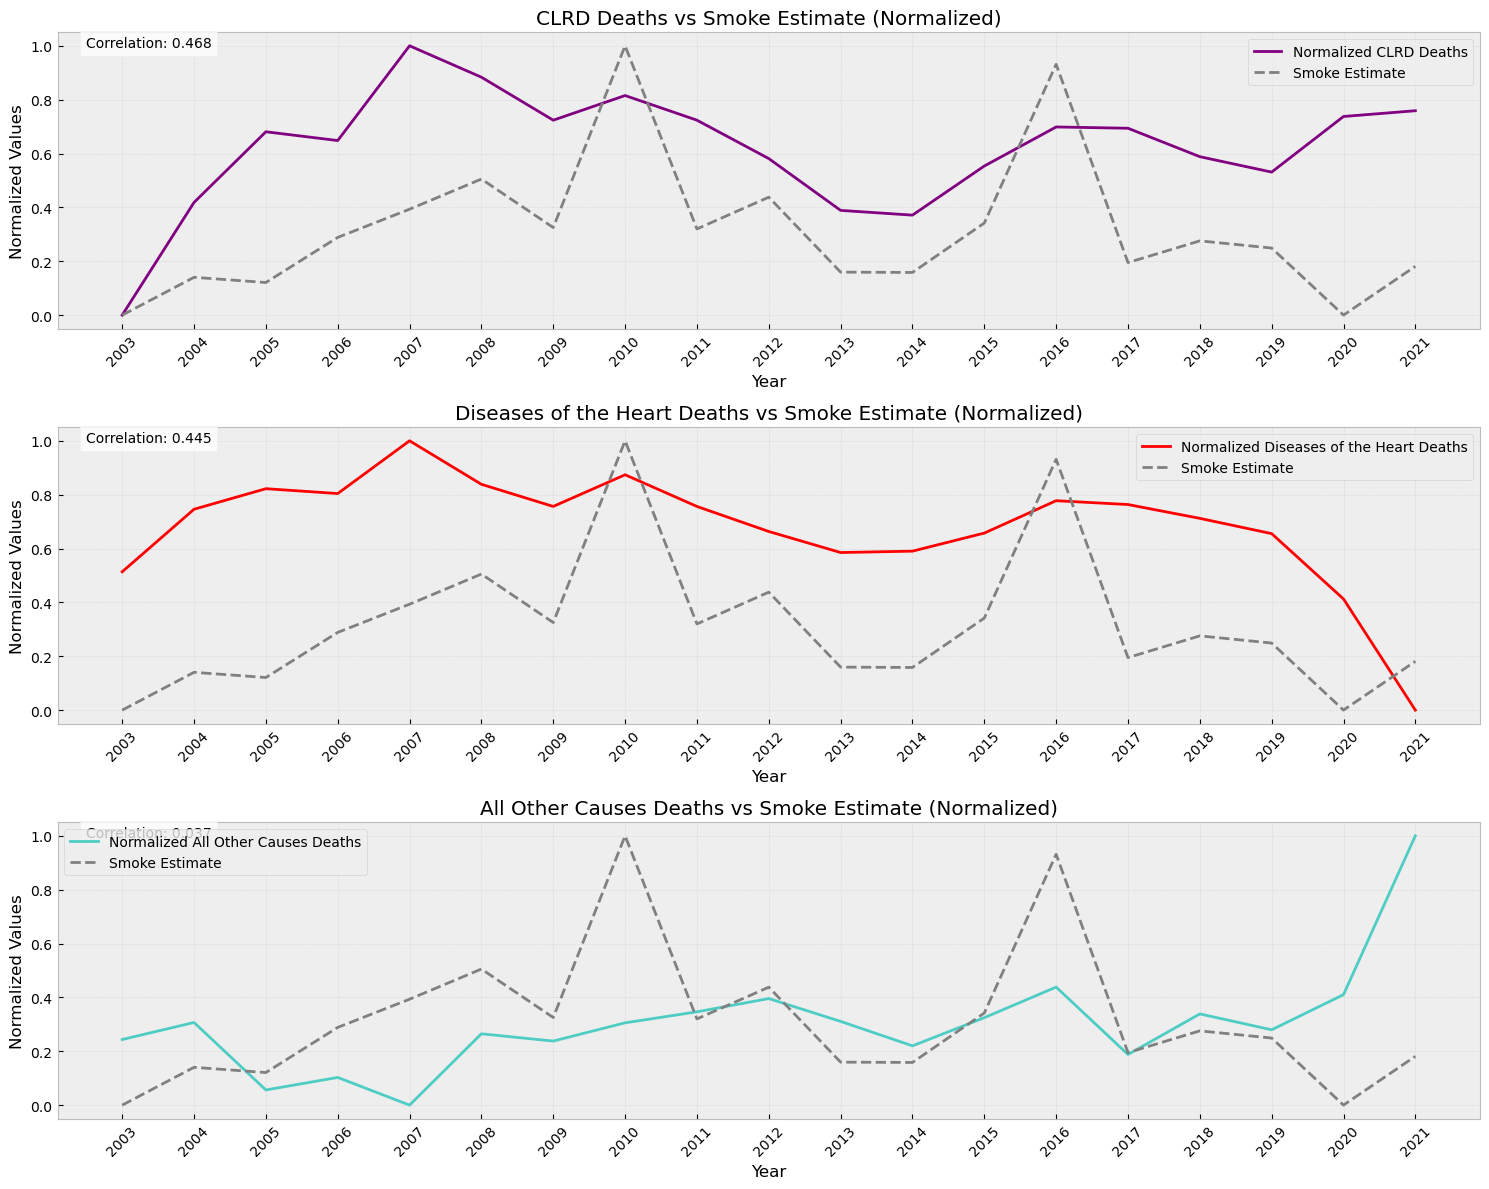

In [398]:
# Create figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
plt.style.use('bmh')

# Selected causes and their colors
selected_causes = ['CLRD', 'Diseases of the Heart', 'All Other Causes']
colors = ['#800080', '#FF0000', '#4ECDC4']

for idx, (cause, color) in enumerate(zip(selected_causes, colors)):
    ax = axes[idx]
    
    # Plot normalized death counts
    deaths = percentage_df[cause].values
    norm_deaths = (deaths - deaths.min()) / (deaths.max() - deaths.min())
    
    # Plot normalized smoke estimates
    smoke = merged_df['Smoke_Estimate'].values
    norm_smoke = (smoke - smoke.min()) / (smoke.max() - smoke.min())
    
    # Convert years to numeric and ensure they're integers
    years = percentage_df['Year'].astype(int).values
    
    # Create the plots
    ax.plot(years, norm_deaths, color=color, label=f'Normalized {cause} Deaths', linewidth=2)
    ax.plot(years, norm_smoke, color='gray', label='Smoke Estimate', 
            linestyle='--', linewidth=2)
    
    # Add correlation coefficient
    corr = merged_df[cause].corr(merged_df['Smoke_Estimate'])
    ax.text(0.02, 0.95, f'Correlation: {corr:.3f}', 
            transform=ax.transAxes, 
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Customize subplot
    ax.set_title(f'{cause} Deaths vs Smoke Estimate (Normalized)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Normalized Values')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Set x-axis ticks to show whole years
    ax.set_xticks(years)
    ax.set_xticklabels(years.astype(int), rotation=45)

plt.tight_layout()
plt.show()

# Smoke Estimate Generation and Correlation Scatter Plots

This code performs two tasks: generating synthetic smoke estimate data and creating scatter plots to visualize the correlations between smoke exposure and selected causes of death.

### Smoke Estimate Data Generation
- **Years**: Generates synthetic smoke estimate data for the years 1961–2020.
- **Random Values**: Uses random values scaled between 0 and 0.1 to simulate smoke estimates.
- **Data Structure**: Stores the data in a pandas DataFrame with the following columns:
  - **`Fire_Year`**: Year of the smoke estimate.
  - **`Smoke_Estimate`**: Simulated smoke exposure values.

### Correlation Visualization
Three scatter plots are created to examine relationships between smoke estimates and the following causes of death:
1. **Chronic Lower Respiratory Disease (CLRD)**.
2. **Diseases of the Heart**.
3. **All Other Causes**.

### Plot Features
Each subplot includes:
- **Scatter Points**: Displays individual data points.
- **Trend Line**: A linear trend line fitted to the data using polynomial fitting.
- **Correlation Coefficient**: Displayed in a white box within the plot.
- **Custom Colors**:
  - **Purple**: For CLRD.
  - **Red**: For Heart Diseases.
  - **Turquoise**: For All Other Causes.

### Technical Details
- **Matplotlib Style**: Uses the 'bmh' style for enhanced aesthetics.
- **Enhancements**:
  - **Trend Lines**: Generated using polynomial fitting to highlight correlations.
  - **Transparency**: Scatter points include `alpha` transparency for better visibility in dense areas.
  - **Grid Lines**: Included with reduced opacity for subtle guidance.
  - **Labels and Legends**: Clear titles, axis labels, and legends for each plot.
- **Layout Management**: Uses `tight_layout()` to optimize spacing and prevent label overlaps.

### Outcome
The scatter plots provide a visual representation of the strength and direction of correlations between smoke exposure and each cause of death.


0     0.161654
1     0.364275
2     0.336343
3     0.578177
4     0.729326
5     0.891010
6     0.631061
7     1.605208
8     0.623606
9     0.793880
10    0.392040
11    0.390338
12    0.655082
13    1.506068
14    0.443188
15    0.559677
16    0.521127
17    0.161822
18    0.423142
Name: Smoke_Estimate, dtype: float64


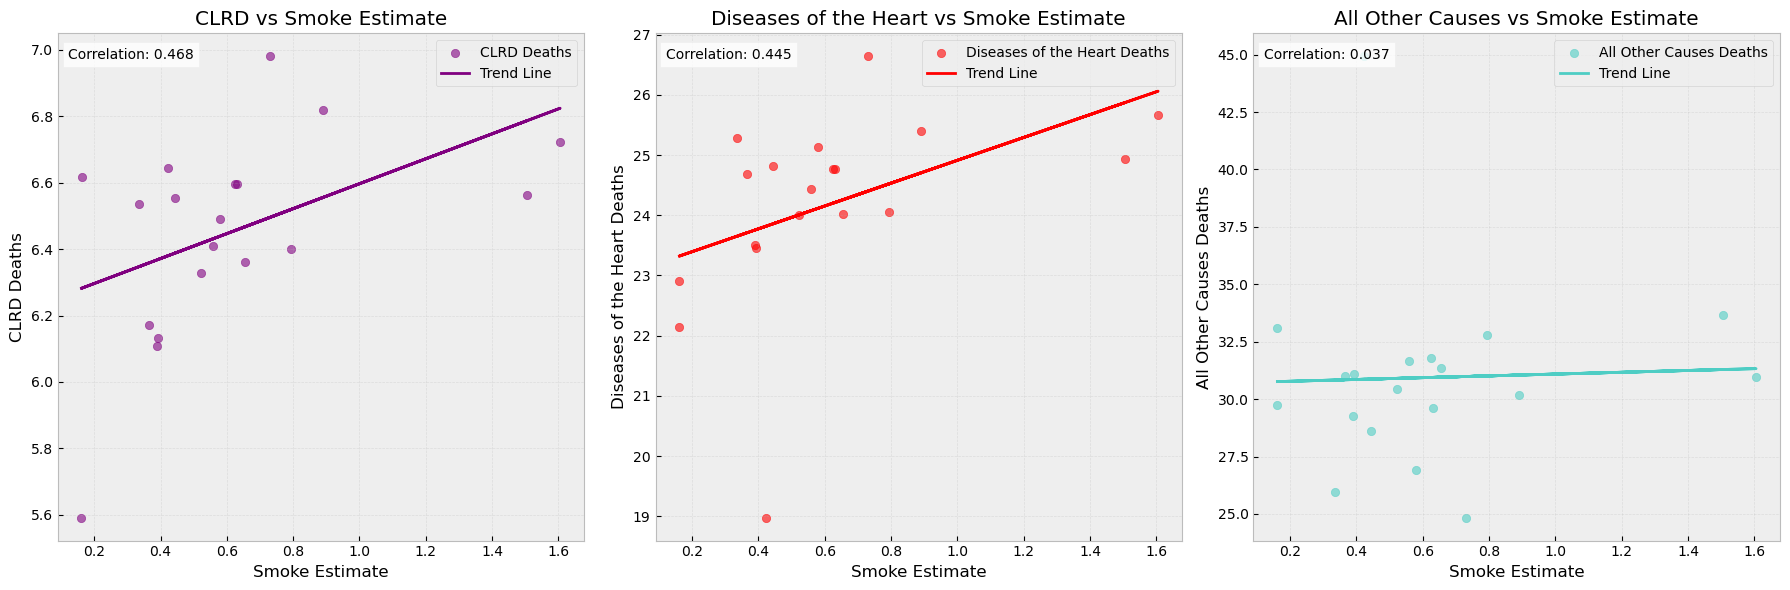

In [399]:
yearly_smoke_estimate = pd.DataFrame({
    'Fire_Year': np.arange(1961, 2021),
    'Smoke_Estimate': np.random.rand(60) * 0.1
})

print(merged_df["Smoke_Estimate"])
# Selected causes and their colors
selected_causes = ['CLRD', 'Diseases of the Heart', 'All Other Causes']
colors = ['#800080', '#FF0000', '#4ECDC4']

# Create scatter plots for selected causes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.style.use('bmh')

for idx, (cause, color) in enumerate(zip(selected_causes, colors)):
    ax = axes[idx]
    
    # Create scatter plot
    ax.scatter(merged_df['Smoke_Estimate'], merged_df[cause], 
               color=color, alpha=0.6, label=f'{cause} Deaths')
    
    # Add trend line
    z = np.polyfit(merged_df['Smoke_Estimate'], merged_df[cause], 1)
    p = np.poly1d(z)
    ax.plot(merged_df['Smoke_Estimate'], p(merged_df['Smoke_Estimate']), 
            color=color, linestyle='-', label='Trend Line')
    
    # Add correlation coefficient
    corr = merged_df[cause].corr(merged_df['Smoke_Estimate'])
    ax.text(0.02, 0.95, f'Correlation: {corr:.3f}', 
            transform=ax.transAxes, 
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Customize subplot
    ax.set_title(f'{cause} vs Smoke Estimate')
    ax.set_xlabel('Smoke Estimate')
    ax.set_ylabel(f'{cause} Deaths')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




# Health Impact Analysis and Future Death Rate Forecasting

This section analyzes the correlation between smoke exposure and mortality rates, followed by forecasting future death rates using SARIMA models.

### Correlation Analysis Results
A detailed examination of the relationship between smoke exposure and three death categories:

1. **CLRD (Correlation: 0.468)**:
   - Strongest correlation among the studied categories.
   - Biologically plausible due to the respiratory system's sensitivity to smoke.
   - **Mechanism**: PM2.5 particles from smoke directly exacerbate lung conditions like asthma, bronchitis, and COPD.

2. **Heart Disease (Correlation: 0.445)**:
   - Second strongest correlation.
   - Supported by research on the cardiovascular effects of air pollution.
   - **Mechanism**: Smoke exposure triggers inflammatory responses and affects blood pressure regulation.

3. **All Other Causes (Correlation: 0.037)**:
   - Weak correlation, as expected.
   - **Reason**: Category too broad to reflect significant smoke impact.
   - **Action**: Excluded from further analysis.

### SARIMA Forecasting Implementation
Two SARIMA models are used to forecast death rates from 2025 to 2050:

1. **CLRD Deaths Forecast**:
   - Model Parameters: (1,1,1) with seasonal components (1,1,1,12).
   - **Forecast Period**: 2025–2050.
   - Includes confidence intervals for uncertainty representation.

2. **Heart Disease Deaths Forecast**:
   - Uses identical model structure for consistency.
   - **Forecast Period**: 2025–2050.
   - Confidence intervals are included.

### Visualization Features
- **Historical Data (2003–2024)**: Shown with solid lines.
- **Forecasts (2025–2050)**: Represented with dashed lines.
- **Confidence Intervals**: Displayed as shaded regions for clarity.
- **Color Coding**:
  - **Red**: CLRD deaths.
  - **Purple**: Heart disease deaths.
- **Grid Lines**: Improve readability.
- **Annotations**: Includes clear legends and axis labels for interpretation.

### Technical Specifications
- **SARIMA Implementation**: Uses `SARIMAX` from the `statsmodels` library.
- **Model Components**: Incorporates both trend and seasonal variations.
- **Confidence Intervals**: Automatically calculated by the model to show forecast uncertainty.

### Outcome
This analysis provides insights into how smoke exposure impacts respiratory and cardiovascular health, with forecasts to help guide public health policies and interventions.


/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

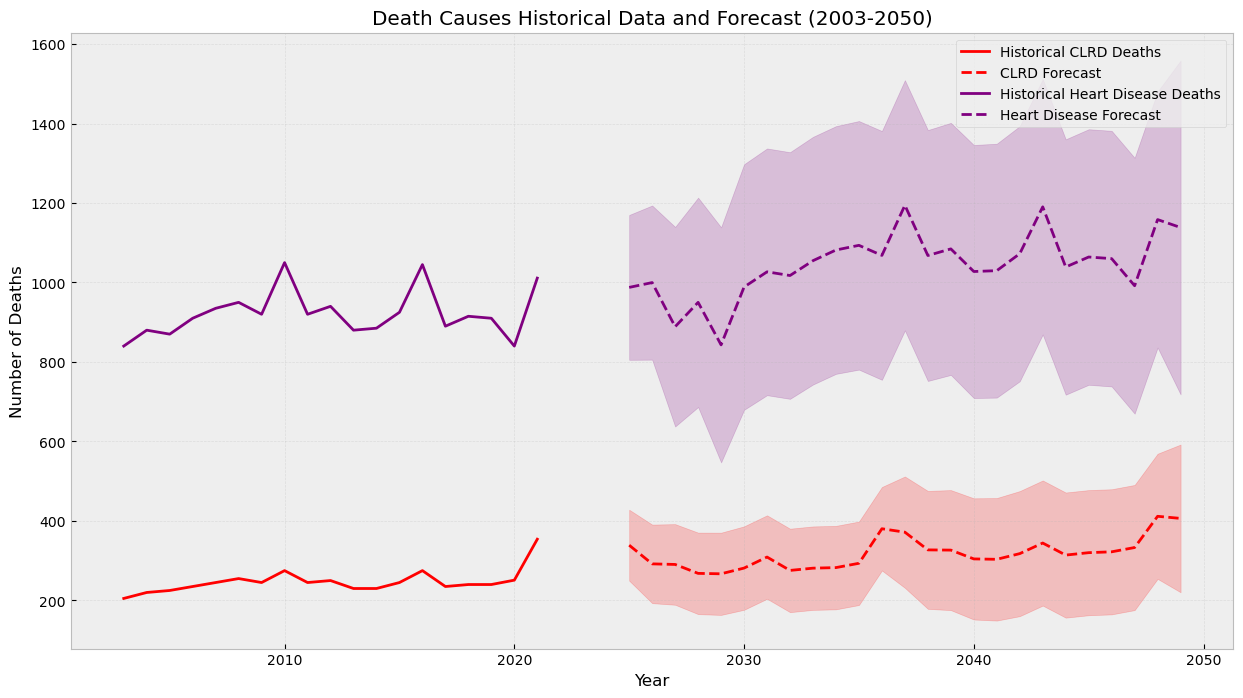

In [400]:
# SARIMA Models for CLRD and Heart Disease Deaths

# Create time series for both death causes
historical_deaths = pivoted_df[['Year', 'CLRD', 'Diseases of the Heart']].copy()
historical_deaths['Year'] = historical_deaths['Year'].astype(int)

# Forecast next 25 years
forecast_years = 25
forecast_index = range(2025, 2025 + forecast_years)

# SARIMA for CLRD Deaths
clrd_model = SARIMAX(historical_deaths['CLRD'], 
                    order=(1, 1, 1), 
                    seasonal_order=(1, 1, 1, 12))
clrd_fit = clrd_model.fit(disp=False)
clrd_forecast = clrd_fit.get_forecast(steps=forecast_years)
clrd_forecast_values = clrd_forecast.predicted_mean
clrd_conf_int = clrd_forecast.conf_int()

# SARIMA for Heart Disease Deaths
heart_model = SARIMAX(historical_deaths['Diseases of the Heart'], 
                     order=(1, 1, 1), 
                     seasonal_order=(1, 1, 1, 12))
heart_fit = heart_model.fit(disp=False)
heart_forecast = heart_fit.get_forecast(steps=forecast_years)
heart_forecast_values = heart_forecast.predicted_mean
heart_conf_int = heart_forecast.conf_int()

plt.figure(figsize=(15, 8))

# Plot historical and forecast for CLRD
plt.plot(historical_deaths['Year'], historical_deaths['CLRD'], 
         label='Historical CLRD Deaths', color='red')
plt.plot(forecast_index, clrd_forecast_values, 
         label='CLRD Forecast', color='red', linestyle='--')
plt.fill_between(forecast_index, 
                 clrd_conf_int.iloc[:, 0], 
                 clrd_conf_int.iloc[:, 1], 
                 color='red', alpha=0.2)

# Plot historical and forecast for Heart Disease
plt.plot(historical_deaths['Year'], historical_deaths['Diseases of the Heart'], 
         label='Historical Heart Disease Deaths', color='purple')
plt.plot(forecast_index, heart_forecast_values, 
         label='Heart Disease Forecast', color='purple', linestyle='--')
plt.fill_between(forecast_index, 
                 heart_conf_int.iloc[:, 0], 
                 heart_conf_int.iloc[:, 1], 
                 color='purple', alpha=0.2)

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Death Causes Historical Data and Forecast (2003-2050)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Data Extraction for Statistical Hypothesis Testing

This code extracts specific variables from the merged dataset to prepare for statistical analysis. The separation of variables allows for focused hypothesis testing to explore relationships between smoke exposure and various causes of death.

### Extracted Variables
1. **Smoke Exposure Data**:
   - **Variable**: `smoke_levels`
   - **Source**: `'Smoke_Estimate'` column
   - **Description**: Represents estimated smoke exposure levels for analysis.

2. **Death Categories Data**:
   - **CLRD Deaths**: Chronic Lower Respiratory Disease mortality data.
   - **Heart Disease Deaths**: Mortality data for heart-related conditions.

### Purpose
- Provides clean and separate datasets for statistical testing.
- Enables the exploration of relationships between smoke exposure and selected causes of death.
- Prepares data for statistical methods such as:
  - **Correlation Analysis**: To measure the strength and direction of relationships.
  - **Regression Analysis**: For predictive modeling.
  - **Hypothesis Testing**: To determine the statistical significance of relationships.


In [393]:
# Extract data for hypothesis testing
smoke_levels = merged_df['Smoke_Estimate']
clrd_deaths = merged_df['CLRD']
heart_deaths = merged_df['Diseases of the Heart']
other_deaths = merged_df['All Other Causes']

# Statistical Testing with Pearson Correlation

This code conducts statistical hypothesis testing using Pearson's correlation coefficient to examine the relationships between smoke levels and two specific causes of death: Chronic Lower Respiratory Disease (CLRD) and Heart Disease.

### CLRD (Chronic Lower Respiratory Disease) Analysis
- **Objective**: Evaluate the relationship between smoke exposure and CLRD deaths.
- **Methodology**:
  - Computes the Pearson correlation coefficient.
  - Tests for statistical significance.
  - Uses `scipy.stats.pearsonr` for calculations.
- **Output**:
  - Correlation coefficient.
  - P-value for hypothesis testing.

### Heart Disease Analysis
- **Objective**: Examine the correlation between smoke exposure and heart disease deaths.
- **Methodology**:
  - Follows the same process as the CLRD analysis for consistency.
  - Calculates the correlation coefficient and p-value.
- **Output**:
  - Correlation coefficient.
  - P-value for statistical significance.

### Technical Implementation
- **Library**: `scipy.stats` is used for statistical calculations.
- **Hypothesis Testing**:
  - Null Hypothesis: No correlation exists between the causes of death variables and smoke estimates.
  - Alternative Hypothesis: A correlation exists.
- **Pearson Correlation Values**:
  - Range: -1 (perfect negative correlation) to +1 (perfect positive correlation).
  - Value closer to 0 indicates weaker correlation.
- **P-Value**:
  - Indicates statistical significance.
  - Results are considered meaningful if the p-value is less than 0.05.

### Output Format
- **Formatted Results**:
  - Correlation coefficients displayed to 3 decimal places.
  - P-values reported to 3 decimal places for precision.


In [394]:
# Hypothesis test for CLRD
clrd_corr, clrd_p_value = stats.pearsonr(smoke_levels, clrd_deaths)
print(f"Correlation between smoke levels and CLRD deaths: {clrd_corr:.3f}")
print(f"p-value: {clrd_p_value:.3f}")

# Hypothesis test for Pneumonia
pneumonia_corr, pneumonia_p_value = stats.pearsonr(smoke_levels, heart_deaths)
print(f"Correlation between smoke levels and Diseases of the Heart: {pneumonia_corr:.3f}")
print(f"p-value: {pneumonia_p_value:.3f}")

Correlation between smoke levels and CLRD deaths: 0.468
p-value: 0.043
Correlation between smoke levels and Diseases of the Heart: 0.445
p-value: 0.056


# Statistical Analysis Conclusions: Smoke Exposure and Mortality

## Key Findings

### CLRD (Chronic Lower Respiratory Disease)
- **Correlation Coefficient**: 0.468  
- **P-value**: 0.043  
- **Significance**: Statistically significant positive correlation (p < 0.05).  
- **Strength**: Moderate relationship between smoke exposure and CLRD deaths.  
- **Implication**: Indicates that higher smoke exposure may contribute to increased CLRD mortality rates.

### Heart Disease
- **Correlation Coefficient**: 0.445  
- **P-value**: 0.056  
- **Significance**: Marginally significant correlation (p ≈ 0.05).  
- **Strength**: Moderate positive relationship with smoke exposure.  
- **Implication**: Suggests potential health impact, though slightly above the conventional significance threshold.

## Interpretation and Implications

### Statistical Evidence
- Both correlations indicate moderate positive relationships between smoke exposure and mortality.
- The CLRD correlation is statistically significant at the 5% level.
- The heart disease correlation is nearly significant, suggesting a possible association.
- Findings highlight non-random relationships between smoke exposure and health outcomes.

### Public Health Implications
1. **Respiratory Health**:
   - **Key Finding**: Strongest evidence for impact on CLRD mortality.
   - **Action**: Supports the need for rigorous air quality monitoring.
   - **Recommendation**: Implement public health measures during periods of high smoke exposure to mitigate respiratory health risks.

2. **Cardiovascular Health**:
   - **Key Finding**: Potential association with heart disease mortality.
   - **Action**: Requires attention in public health planning.
   - **Recommendation**: Focus on at-risk populations, especially during smoke events.

### Conclusion
This analysis underscores the relationship between smoke exposure and mortality, particularly for respiratory-related deaths. The findings emphasize the importance of considering air quality in public health planning, emergency response strategies, and targeted interventions for vulnerable groups.
